In [1]:
#importing all the required libraries

import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np

In [2]:
#target_url
url ='https://www.amazon.com.au/gp/bestsellers/books/'

In [3]:
#using the requests library to first send a get request and then capturing
# the response 
response = requests.get(url)

In [4]:
#checking the status code
response.status_code

200

In [5]:
#a status code of 200 means that our request was successful

In [6]:
books_amazon = response.text

In [7]:
#writing the text response from amazon to an html file on our system 
with open('books.html', 'w') as f:
    f.write(books_amazon)

Now let us open 'books.html' from our system and check if the page has all the information we need.
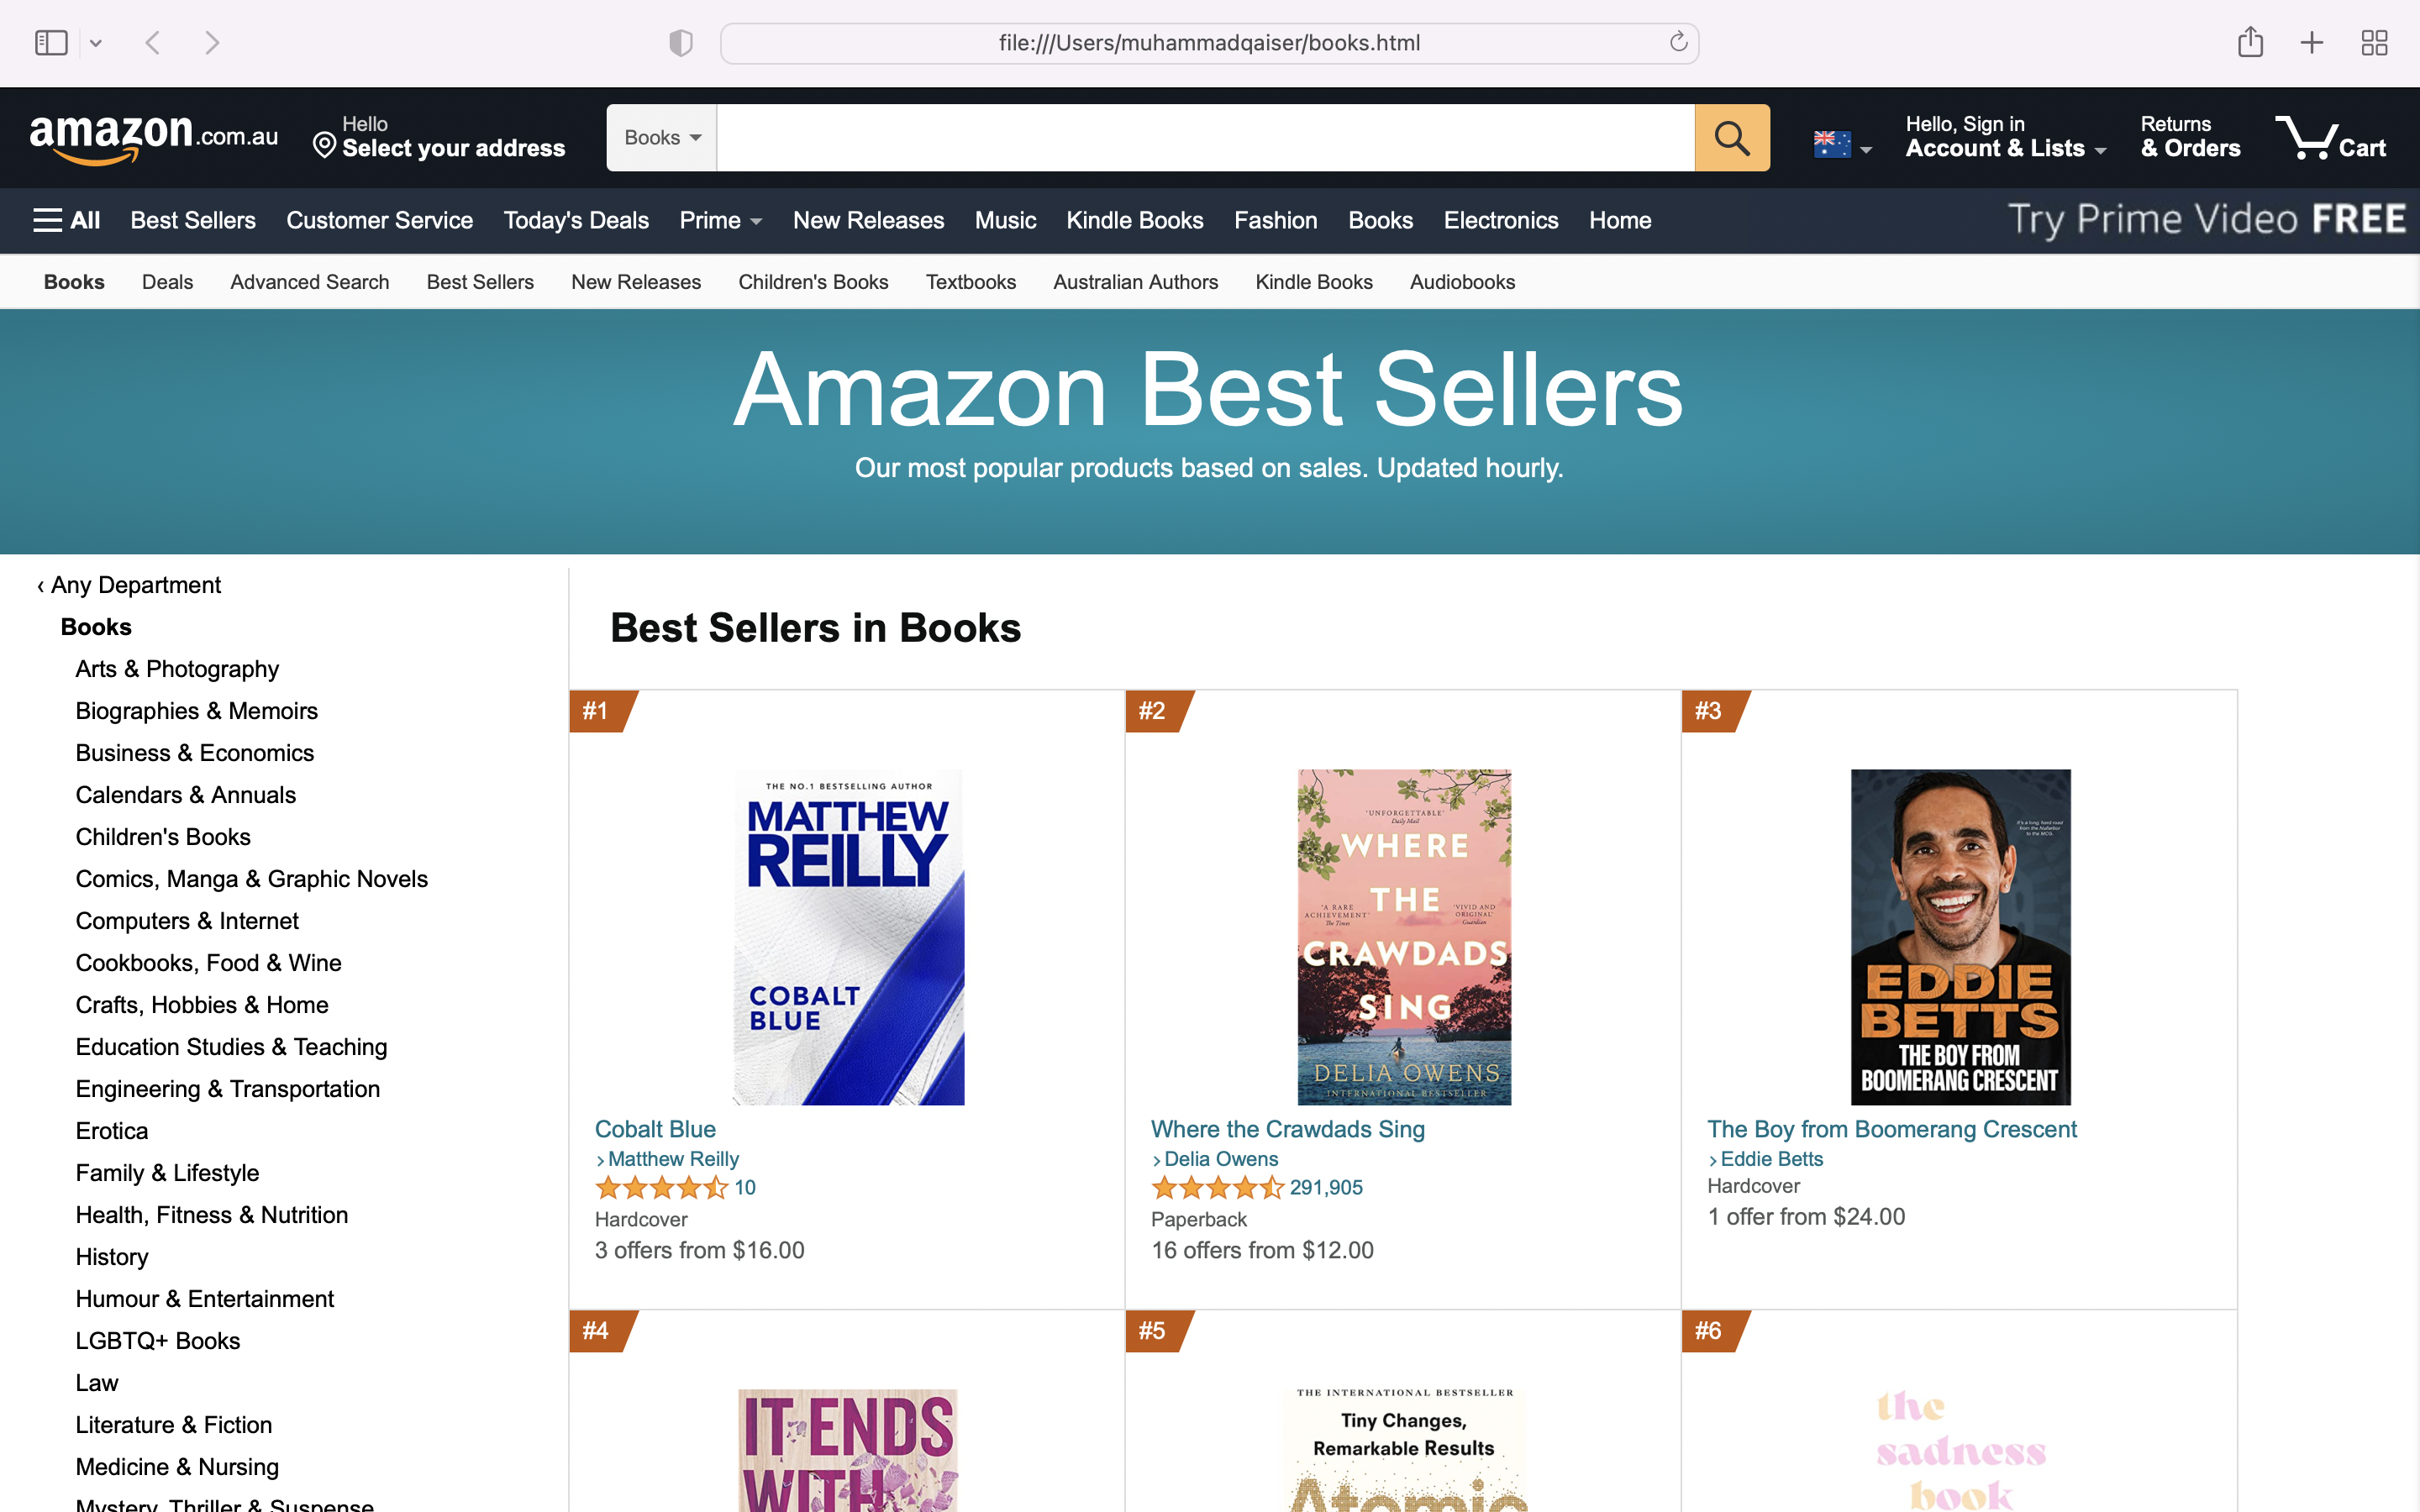


We can see from the above image that the file ('books.html) on our system loads successfully and hence we can proceed to play around with it using Beautiful Soup. This is a good practice as some websites load dynamically and they will not contain all our required information.


In [8]:
#creating a soup object
best_selling = BeautifulSoup(books_amazon, 'html.parser')

FINDING THE PARENT TAG:

By inspecting the url, it can be seen that all books on this page have a tag of div with the class of <font color='red'>'a-column a-span12 a-text-center _cDEzb_grid-column_2hIsc'</font>. Therefore, if we find all the divs with this class and then loop through them, we can scrape our desired information.

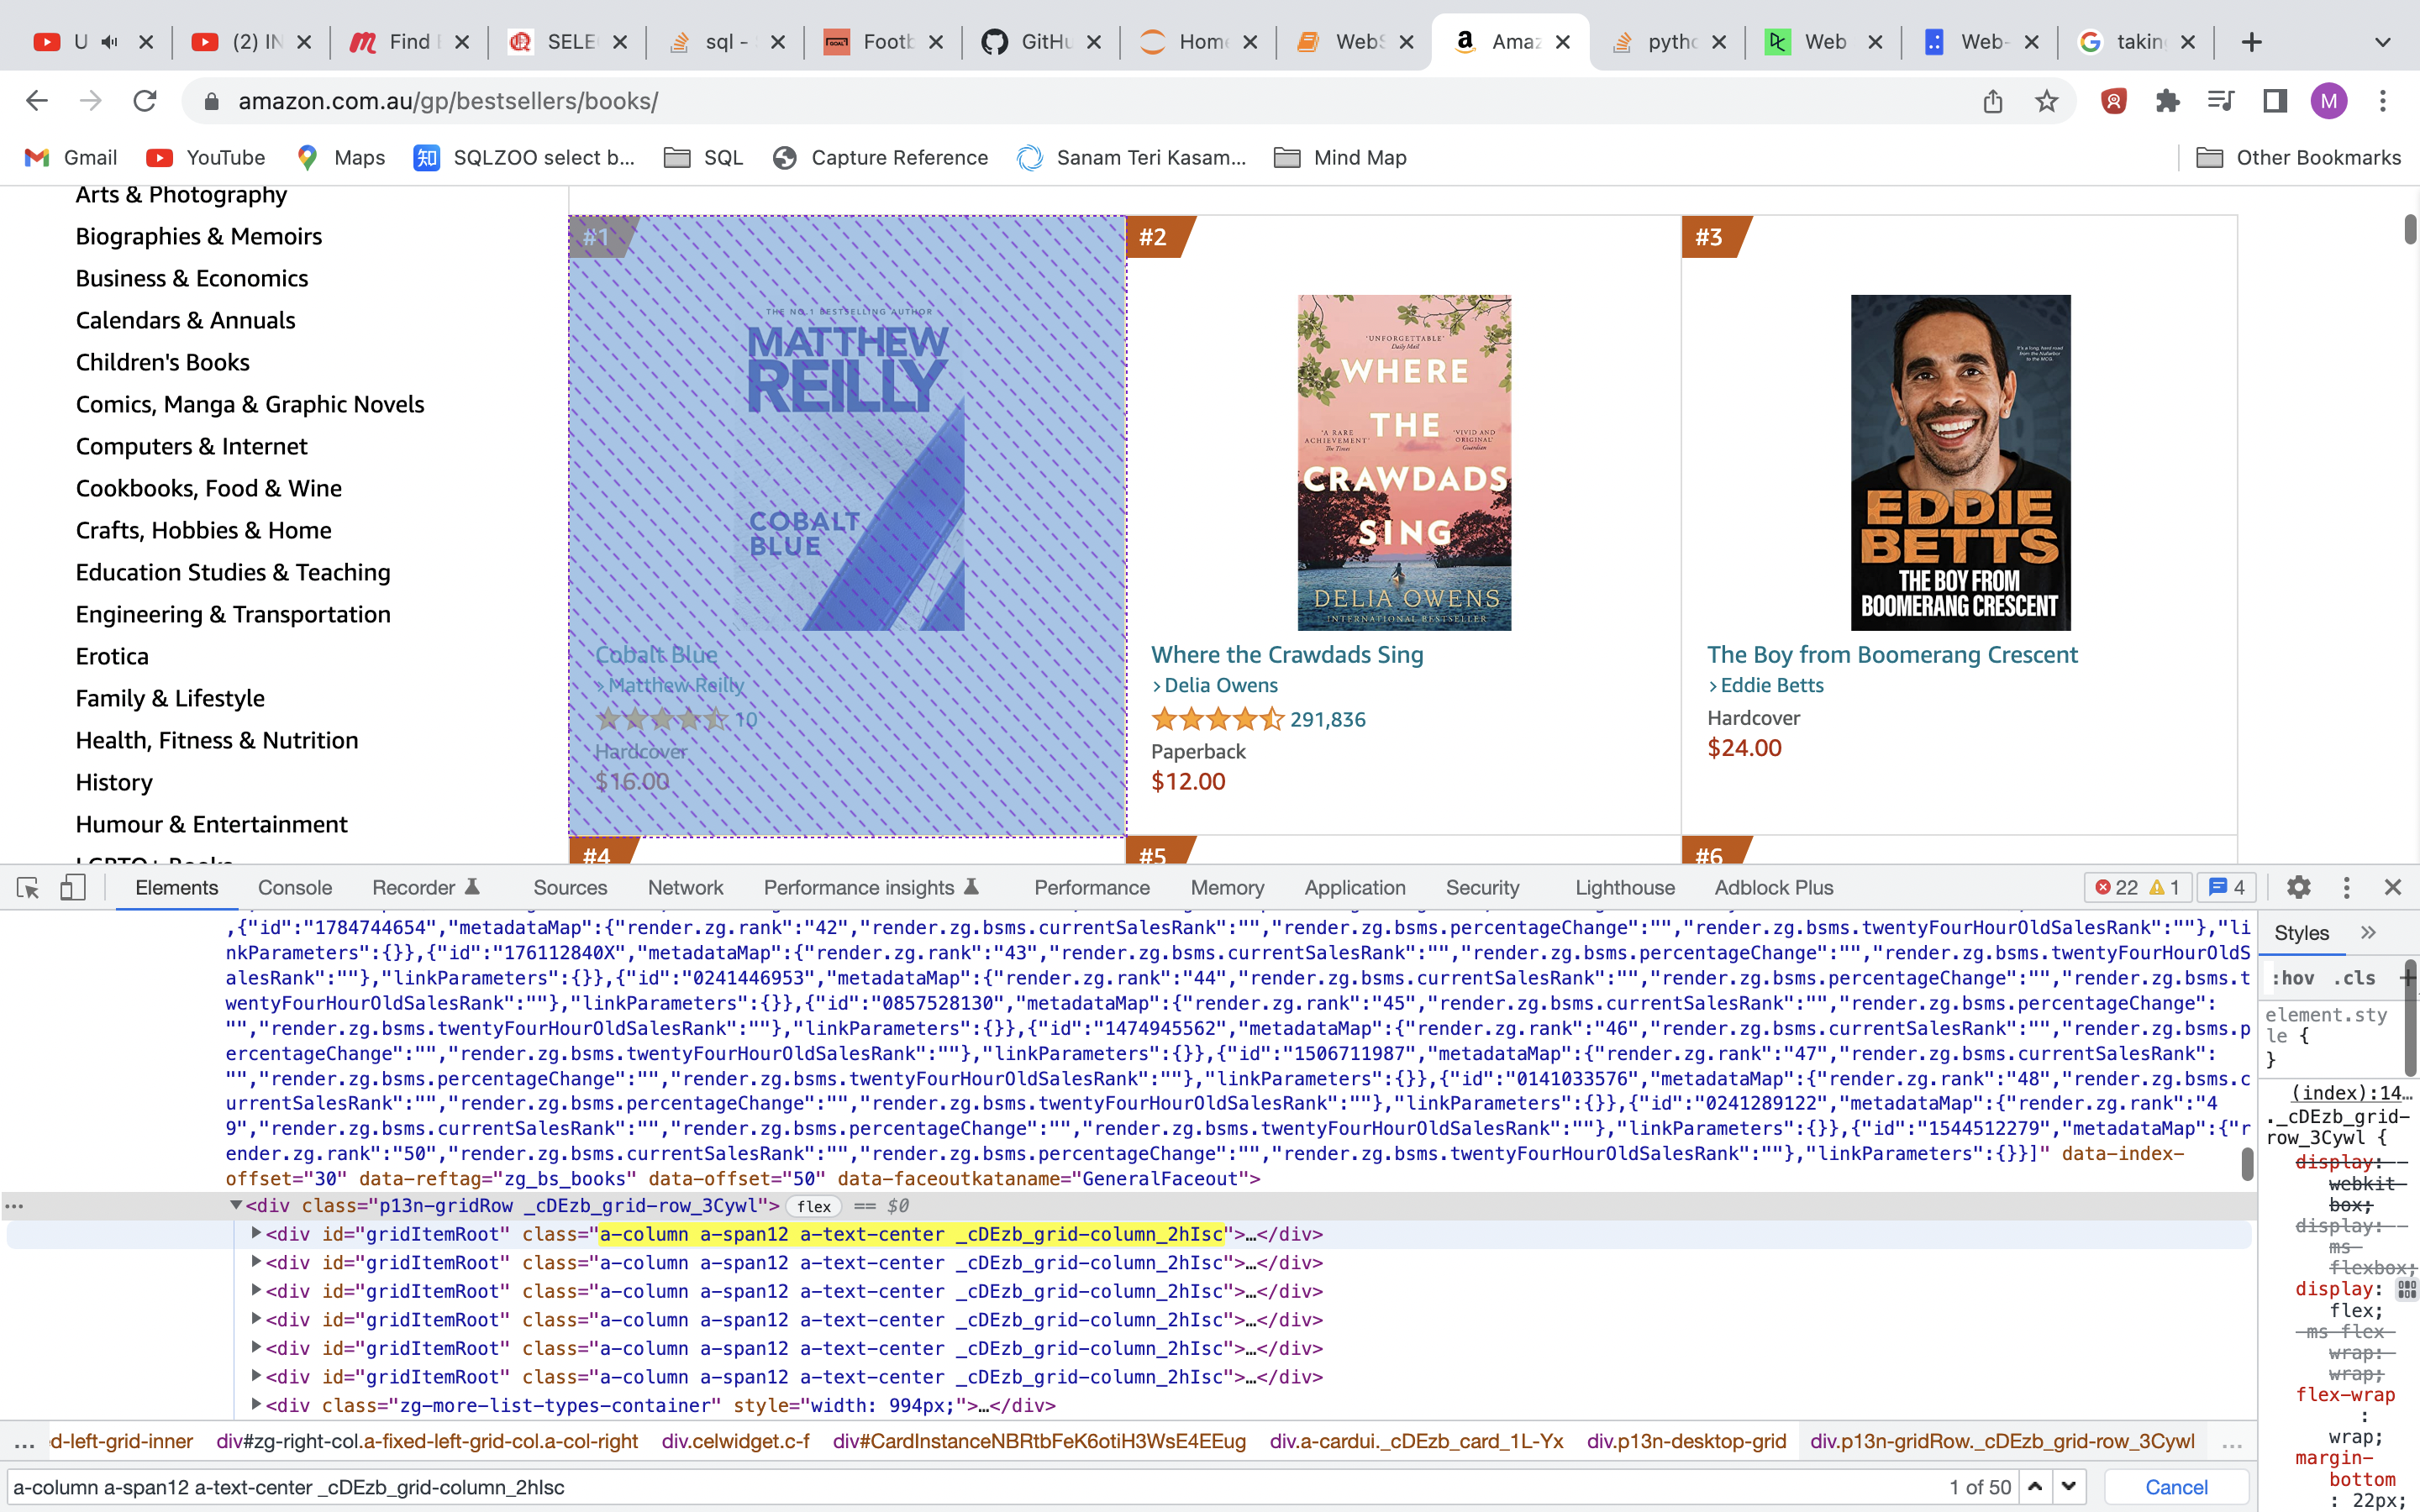


In [9]:

selection_new = 'a-column a-span12 a-text-center _cDEzb_grid-column_2hIsc' #all the books have this class
containers = best_selling.find_all('div', class_= selection_new) #finding all the divs with the above class

titles = []
prices = []
authors = []
ratings = []
reviews=[]
link =[]

for info in containers:
    title_href_sel = 'a-link-normal' #title and href are both are present in the tag
    title_href =info.find('a', class_ = title_href_sel)
    if title_href is not None: #checking if title is not missing
        titles.append(title_href.img['alt'])
        href = title_href.get('href')
        link.append('https://amazon.com.au'+href)

    else:
        titles.append('Missing')
        link.append('Missing')
        
    price_class = 'p13n-sc-price'
    price = info.find('span', class_=price_class)
    if price is not None:  #checking if price is not missing
        prices.append(price.text)
    else:
        prices.append('Missing')
    author_class = 'a-row a-size-small'
    author = info.find('div', class_ = author_class)
    if author is not None:  #checking if author is not missing
        authors.append(author.text)
    else:
        authors.append('Missing')
    ratings_class = 'a-icon-row'
    rating = info.find('div', class_=ratings_class)
    if rating is not None:  #checking if ratings and reviews are not missing
        ratings.append(rating.find('span', class_='a-icon-alt').text[:3])
        reviews.append(rating.find('span', class_='a-size-small').text) 
    else:
        ratings.append('NA')
        reviews.append('0')
            
        

In [10]:
books_dict= {'Title': titles, 'Author': authors, 'Price': prices,'Rating':
            ratings, 'Number of Reviews': reviews, 'Link': link}

In [11]:
df = pd.DataFrame(books_dict)

### DATA CLEANING:
Now let's clean this dataframe so that we can futher explore it. 

In [12]:
df.head()

Title          Author   Price  \
0                    The Boy from Boomerang Crescent     Eddie Betts  $24.00   
1                            Where the Crawdads Sing     Delia Owens  $12.00   
2                                        Cobalt Blue  Matthew Reilly  $16.00   
3  It Ends With Us: The emotional #1 Sunday Times...  Colleen Hoover  $12.00   
4  Atomic Habits: the life-changing million-copy ...     James Clear  $19.60   

  Rating Number of Reviews                                               Link  
0     NA                 0  https://amazon.com.au/My-Journey-Eddie-Betts/d...  
1    4.7           292,705  https://amazon.com.au/Where-Crawdads-Sing-Deli...  
2    4.3                29  https://amazon.com.au/Cobalt-Blue-Matthew-Reil...  
3    4.5           128,296  https://amazon.com.au/Ends-Us-Colleen-Hoover/d...  
4    4.6            54,309  https://amazon.com.au/Atomic-Habits-Proven-Bui...

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              50 non-null     object
 1   Author             50 non-null     object
 2   Price              50 non-null     object
 3   Rating             50 non-null     object
 4   Number of Reviews  50 non-null     object
 5   Link               50 non-null     object
dtypes: object(6)
memory usage: 2.5+ KB


In order to perform any analysis on this dataframe, we first need to convert Price, Rating and Number of Reviews to either the data type of int or float. But before attempting to do that, we will handle 'Missing' and 'NA' strings in these columns. Moreover, we also need to characters such as a comma or $ sign from these columns

In [14]:
# Replacing strings of NA and Missing with Numpy's Not a Number (NaN)
df.replace('NA', np.nan, inplace =True)
df.replace('Missing', np.nan, inplace=True)

In [15]:
df['Number of Reviews']

0           0
1     292,705
2          29
3     128,296
4      54,309
5      46,116
6         157
7      60,102
8     116,790
9           0
10          1
11          2
12          0
13    102,280
14      3,794
15     41,727
16      8,250
17        287
18          1
19     50,847
20     52,659
21      6,730
22      3,507
23          0
24      2,191
25     56,513
26     12,181
27      1,130
28    120,906
29      6,293
30     49,347
31     29,507
32     71,115
33     24,794
34     27,710
35          4
36      7,491
37    114,380
38      3,915
39          0
40        151
41      6,509
42     13,540
43     24,882
44          3
45     22,893
46      1,596
47     87,396
48      6,648
49          0
Name: Number of Reviews, dtype: object

In [16]:
#Removing commas from elements of this column

df['Number of Reviews']= df['Number of Reviews'].str.replace(',','')

In [17]:
# finally, converting this column to int
df['Number of Reviews']= df['Number of Reviews'].astype(int)

In [18]:
df['Price']

0     $24.00
1     $12.00
2     $16.00
3     $12.00
4     $19.60
5     $21.22
6     $18.99
7     $12.00
8     $12.00
9     $22.00
10     $8.00
11    $26.62
12    $22.00
13    $12.00
14    $19.00
15    $21.78
16    $20.15
17    $22.00
18    $28.99
19    $16.00
20    $11.99
21    $12.00
22     $7.49
23       NaN
24    $19.00
25    $19.50
26    $12.00
27    $22.99
28    $10.29
29     $9.95
30    $11.99
31    $12.00
32    $15.99
33     $6.38
34    $15.00
35     $6.00
36    $12.00
37    $14.72
38    $14.59
39    $65.99
40    $34.66
41    $12.00
42    $16.09
43    $10.00
44    $22.00
45    $11.04
46     $6.00
47    $14.00
48    $18.99
49     $8.00
Name: Price, dtype: object

In [19]:
# first removing the $ sign and then converting it to a float
df['Price']= df['Price'].str.strip('$').astype(float)

In [20]:
df['Rating']

0     NaN
1     4.7
2     4.3
3     4.5
4     4.6
5     4.7
6     4.6
7     4.4
8     4.4
9     NaN
10    5.0
11    4.5
12    NaN
13    4.5
14    4.6
15    4.6
16    4.6
17    4.7
18    5.0
19    4.8
20    4.5
21    4.5
22    4.6
23    NaN
24    4.8
25    4.4
26    4.5
27    4.5
28    4.2
29    4.7
30    4.5
31    4.5
32    4.6
33    4.8
34    4.5
35    5.0
36    4.5
37    4.5
38    4.5
39    NaN
40    4.7
41    4.5
42    4.7
43    4.8
44    3.6
45    4.8
46    4.7
47    4.4
48    4.5
49    NaN
Name: Rating, dtype: object

In [23]:
# converting the ratings columns to float
df['Rating'] = df['Rating'].astype(float)

In [24]:
df.head()

Title          Author  Price  \
0                    The Boy from Boomerang Crescent     Eddie Betts   24.0   
1                            Where the Crawdads Sing     Delia Owens   12.0   
2                                        Cobalt Blue  Matthew Reilly   16.0   
3  It Ends With Us: The emotional #1 Sunday Times...  Colleen Hoover   12.0   
4  Atomic Habits: the life-changing million-copy ...     James Clear   19.6   

   Rating  Number of Reviews  \
0     NaN                  0   
1     4.7             292705   
2     4.3                 29   
3     4.5             128296   
4     4.6              54309   

                                                Link  
0  https://amazon.com.au/My-Journey-Eddie-Betts/d...  
1  https://amazon.com.au/Where-Crawdads-Sing-Deli...  
2  https://amazon.com.au/Cobalt-Blue-Matthew-Reil...  
3  https://amazon.com.au/Ends-Us-Colleen-Hoover/d...  
4  https://amazon.com.au/Atomic-Habits-Proven-Bui...

In [25]:
best_selling_books = df.to_csv('best_selling.csv', index = False)